# Data Mining - assignment #1

## Second Approach: Apriori Algorithm


In [76]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

### Read true.csv file and label it with 1


In [77]:
true_df = pd.read_csv(r"True.csv", sep=",")
true_df["label"] = 1
true_df.sample(5)

,title,text,subject,date,label
5595,The Trump presidency on Feb. 7 at 9:47 EST,(Reuters) - Highlights of the day for U.S. Pre...,politicsNews,"February 7, 2017",1
2124,Missouri lawmaker criticized after wishing for...,(Reuters) - A Democratic Missouri state senato...,politicsNews,"August 17, 2017",1
6681,"Trump taps retired general, TV analyst for NSC...",(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 15, 2016",1
18225,Russia hunting four people behind huge bomb ho...,MOSCOW (Reuters) - The head of Russia s FSB se...,worldnews,"October 5, 2017",1
16557,U.S. says 'administrative error' blocked Indon...,JAKARTA (Reuters) - Indonesia s military chief...,worldnews,"October 25, 2017",1


### Read fake.csv file and label it with 0


In [78]:
fake_df = pd.read_csv(r"Fake.csv", sep=",")
fake_df["label"] = 0
fake_df.sample(5)

,title,text,subject,date,label
5579,McConnell Just ADMITTED The NRA Must Approve ...,We could already make the assumption that Sena...,News,"July 6, 2016",0
21392,Obama Throws Gasoline On Black Terrorists War ...,If a black man is elected president in a count...,left-news,"Oct 25, 2015",0
14873,MUSLIM CONGRESSMAN Abruptly Leaves DC: Uses Fi...,Rep. Keith Ellison (D-MN) is more than just a ...,politics,"Nov 29, 2015",0
3367,Robert Reich Drops MAJOR Dose Of Cold Truth A...,There s a major problem with Trump considering...,News,"December 17, 2016",0
11334,NANCY PELOSI ASKED: Who’s the Leader of the De...,,politics,"Mar 22, 2017",0


### Combine true and fake news in one dataframe


In [79]:
all_news_df = pd.concat([true_df, fake_df], ignore_index=True)
all_news_df.sample(10)

,title,text,subject,date,label
25149,Spice Company Owner Causes Family Feud When H...,After eight years of being told that Barack Ob...,News,"November 20, 2016",0
35213,UNREAL! BLACK TRUMP SUPPORTER Threatened And A...,This guy is awesome! He is so right and so on ...,politics,"May 29, 2016",0
34279,JUDGE JEANINE SCORCHES HILLARY: “You don’t sup...,,politics,"Oct 2, 2016",0
11825,Turkey's Erdogan defends Ottoman commander aft...,ISTANBUL (Reuters) - Turkish President Tayyip ...,worldnews,"December 20, 2017",1
22380,Trump Just Got Caught Trying To Blackmail Mor...,Blackmail is a crime. It s time to impeach Don...,News,"June 30, 2017",0
5719,Trump says his travel ban needed to ensure U.S...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 2, 2017",1
40812,"WHY DID 14 Massive Teen Mall Brawls, Including...",MASSIVE PLANNED MALL FIGHTS Broke out across t...,left-news,"Dec 27, 2016",0
14642,Suspicious object found with body in Stockholm...,STOCKHOLM (Reuters) - A man was found dead on ...,worldnews,"November 16, 2017",1
8134,Trump biofuel proposals echo those of backer I...,NEW YORK (Reuters) - Republican Presidential c...,politicsNews,"September 16, 2016",1
44170,TSA: US Residents from 9 States Will Need Pass...,This latest move by America s notorious Transp...,Middle-east,"October 16, 2017",0


### Produce a Frequency-Term Table out of the datafarame


In [80]:
vectorizer = CountVectorizer(stop_words='english', min_df=1000, token_pattern=r'[a-zA-Z]{2,}', binary=True)
matrix = vectorizer.fit_transform(all_news_df["title"] + " " + all_news_df["text"])

In [81]:
sparse_df = pd.DataFrame.sparse.from_spmatrix(
    matrix, columns=vectorizer.get_feature_names_out()
)
sparse_df.sample(10)

,abc,ability,able,absolutely,accept,access,according,account,accounts,accusations,...,written,wrong,wrote,year,years,yes,yesterday,york,young,youtube
41809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14423,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7272,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7086,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
35888,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15245,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
12776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33598,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Produce Frequent Itemsets


In [82]:
freq_items = apriori(sparse_df, min_support=0.1, use_colnames=True)
freq_items.sample(20)

C:\Users\ibrahima\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
536,0.120050,"(president, saying)"
109,0.431779,(people)
129,0.213395,(right)
1055,0.112655,"(donald, trump, said, presidential)"
1009,0.123213,"(campaign, trump, donald, said)"
1062,0.103746,"(donald, states, trump, reuters)"
114,0.128914,(policy)
993,0.100160,"(said, year, states)"
622,0.148024,"(said, wednesday)"
318,0.156488,"(election, trump)"


### List the top 20 popular words


In [83]:
freq_words = freq_items[freq_items["itemsets"].apply(len) == 1]
frequent_words_sorted = freq_words.sort_values(by="support", ascending=False)
top_20 = frequent_words_sorted.head(20)
top_20

,support,itemsets
132,0.732460,(said)
118,0.529110,(president)
155,0.504967,(trump)
128,0.483028,(reuters)
109,0.431779,(people)
42,0.412602,(donald)
99,0.360706,(new)
69,0.343846,(just)
153,0.337922,(told)
142,0.321217,(state)


### Bar plot visualization of the 20 top popular words


C:\Users\ibrahima\AppData\Local\Temp\ipykernel_34884\487118267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20["itemsets_str"] = top_20["itemsets"].apply(lambda x: ", ".join(list(x)))


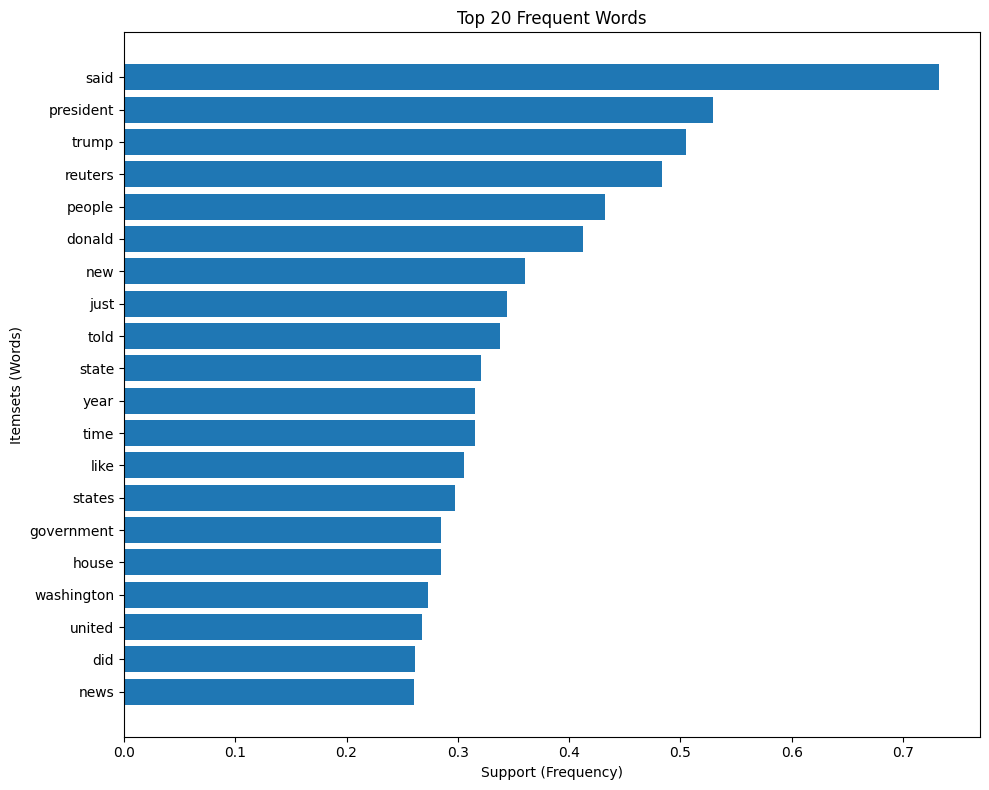

In [84]:
top_20["itemsets_str"] = top_20["itemsets"].apply(lambda x: ", ".join(list(x)))
plt.figure(figsize=(10, 8))
plt.barh(top_20["itemsets_str"], top_20["support"])
plt.xlabel("Support (Frequency)")
plt.ylabel("Itemsets (Words)")
plt.title("Top 20 Frequent Words")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Generate association rules out of the frequent Itemsets


In [85]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.9)
print(f"{len(rules)} rules generated.")
rules_sorted = rules.sort_values(by="lift", ascending=False)
rules_sorted.head(20)

330 rules generated.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
152,"(image, donald)","(featured, trump)",0.124193,0.139294,0.113814,0.916428,6.579112,1.0,0.096514,10.298926,0.968254,0.760417,0.902902,0.866752
151,"(featured, donald)","(trump, image)",0.119805,0.145730,0.113814,0.949991,6.518827,1.0,0.096354,17.082218,0.961830,0.750147,0.941460,0.865489
21,"(hillary, said)",(clinton),0.114704,0.168493,0.106842,0.931456,5.528159,1.0,0.087515,12.131051,0.925237,0.605835,0.917567,0.782780
22,"(said, clinton)",(hillary),0.116843,0.173838,0.106842,0.914411,5.260118,1.0,0.086530,9.652658,0.917040,0.581173,0.896402,0.764509
23,"(trump, clinton)",(hillary),0.122856,0.173838,0.110940,0.903009,5.194531,1.0,0.089583,8.517957,0.920590,0.597242,0.882601,0.770595
329,"(donald, said, president, united)","(trump, states)",0.111631,0.182235,0.105149,0.941939,5.168809,1.0,0.084806,14.084662,0.907879,0.557182,0.929001,0.759469
312,"(donald, said, united)","(trump, states)",0.123792,0.182235,0.116598,0.941886,5.168514,1.0,0.094038,14.071629,0.920467,0.615520,0.928935,0.790852
298,"(donald, president, united)","(trump, states)",0.126732,0.182235,0.119070,0.939543,5.155659,1.0,0.095975,13.526399,0.923013,0.627023,0.926070,0.796464
231,"(donald, united)","(states, trump)",0.143592,0.182235,0.134639,0.937645,5.145246,1.0,0.108471,13.114749,0.940727,0.704217,0.923750,0.838231
15,(barack),"(obama, president)",0.119137,0.184819,0.110562,0.928024,5.021260,1.0,0.088543,11.325724,0.909161,0.571692,0.911705,0.763120


### Scatterplot of the rules was generated (between support and confidence)


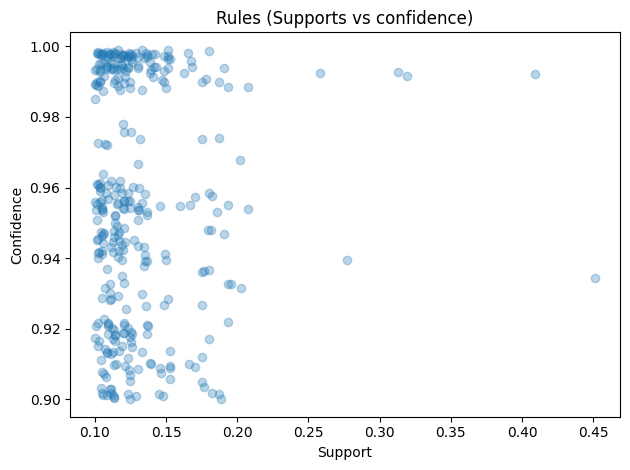

In [86]:
plt.scatter(rules["support"], rules["confidence"], alpha=0.3)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Rules (Supports vs confidence)")
plt.gca()
plt.tight_layout()

In [87]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(added),(said),0.111876,0.732460,0.102544,0.916584,1.251377,1.0,0.020599,3.207284,0.226185,0.138238,0.688210,0.528291
1,(barack),(obama),0.119137,0.229966,0.118535,0.994952,4.326525,1.0,0.091138,152.552351,0.872857,0.514104,0.993445,0.755200
2,(barack),(president),0.119137,0.529110,0.110807,0.930080,1.757819,1.0,0.047770,6.734728,0.489421,0.206175,0.851516,0.569751
3,(donald),(trump),0.412602,0.504967,0.409306,0.992011,1.964507,1.0,0.200955,61.962769,0.835832,0.805302,0.983861,0.901285
4,(featured),(image),0.191389,0.207470,0.181433,0.947981,4.569237,1.0,0.141726,15.235365,0.966034,0.834460,0.934363,0.911242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,"(trump, said, president, states, united)",(donald),0.113212,0.412602,0.105149,0.928782,2.251037,1.0,0.058438,8.247913,0.626712,0.249960,0.878757,0.591814
326,"(trump, said, president, donald, united)",(states),0.111119,0.297096,0.105149,0.946282,3.185108,1.0,0.072137,13.085037,0.771800,0.346954,0.923577,0.650103
327,"(trump, said, states, donald, united)",(president),0.116598,0.529110,0.105149,0.901815,1.704398,1.0,0.043456,4.795928,0.467830,0.194520,0.791490,0.550272
328,"(said, president, states, donald, united)",(trump),0.105417,0.504967,0.105149,0.997465,1.975307,1.0,0.051918,195.249339,0.551933,0.208120,0.994878,0.602848


## Analyze the association rules based on top words of fake and true news:
- Find unique sets of top words for both the fake the true news and filter the association rules based on them

Unique Top Real Words Set:

In [88]:
from common_words import get_pure_top_real_words_set
pure_real_set = get_pure_top_real_words_set()
pure_real_set

{'called',
 'country',
 'election',
 'government',
 'house',
 'including',
 'minister',
 'national',
 'republican',
 'reuters',
 'security',
 'state',
 'statement',
 'states',
 'thursday',
 'tuesday',
 'united',
 'wednesday',
 'week',
 'years'}

Unique Top Fake Words Set:

In [89]:
from common_words import get_pure_top_fake_words_set
pure_fake_set = get_pure_top_fake_words_set()
pure_fake_set

{'america',
 'american',
 'don',
 'featured',
 'going',
 'image',
 'just',
 'know',
 'like',
 'make',
 'news',
 'obama',
 'right',
 'say',
 'statehouse',
 'video',
 'watch',
 'way',
 'white'}

### Association Rules More related to fake news

In [90]:
mask_col1 = rules["antecedents"].apply(lambda x: not pure_fake_set.isdisjoint(x))
mask_col2 = rules["consequents"].apply(lambda x: not pure_fake_set.isdisjoint(x))

most_likely_fake_rules = rules[mask_col1 & mask_col2]
most_likely_fake_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(featured),(image),0.191389,0.207470,0.181433,0.947981,4.569237,1.0,0.141726,15.235365,0.966034,0.834460,0.934363,0.911242
34,"(featured, donald)",(image),0.119805,0.207470,0.114036,0.951850,4.587885,1.0,0.089180,16.459527,0.888479,0.534782,0.939245,0.750750
35,"(image, donald)",(featured),0.124193,0.191389,0.114036,0.918221,4.797659,1.0,0.090267,9.887748,0.903812,0.565808,0.898865,0.757027
78,"(featured, just)",(image),0.130273,0.207470,0.124549,0.956061,4.608183,1.0,0.097521,18.036990,0.900276,0.584204,0.944558,0.778191
79,"(image, just)",(featured),0.138380,0.191389,0.124549,0.900048,4.702708,1.0,0.098064,8.090013,0.913810,0.606903,0.876391,0.775405
80,"(featured, like)",(image),0.109983,0.207470,0.105194,0.956460,4.610107,1.0,0.082376,18.202381,0.879854,0.495593,0.945062,0.731746
81,"(featured, people)",(image),0.121475,0.207470,0.115306,0.949212,4.575169,1.0,0.090103,15.604539,0.889479,0.539721,0.935916,0.752491
82,"(featured, said)",(image),0.117912,0.207470,0.111208,0.943143,4.545920,1.0,0.086744,13.939045,0.884291,0.519239,0.928259,0.739580
83,"(featured, trump)",(image),0.139294,0.207470,0.133124,0.955708,4.606483,1.0,0.104225,17.893433,0.909619,0.623123,0.944114,0.798681
84,"(trump, image)",(featured),0.145730,0.191389,0.133124,0.913495,4.772968,1.0,0.105233,9.347596,0.925336,0.652582,0.893021,0.804531


### Association Rules More related to true news

In [91]:
mask_col1 = rules["antecedents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))
mask_col2 = rules["consequents"].apply(lambda x: not (pure_real_set.isdisjoint(x)))

# 3. Combine masks: Keep row only if BOTH columns are disjoint from exclude_set
most_likely_true_rules = rules[mask_col1 | mask_col2]
most_likely_true_rules = most_likely_true_rules.sort_values(by='support', ascending=False)
most_likely_true_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,(reuters),(said),0.483028,0.732460,0.451267,0.934246,1.275491,1.0,0.097468,4.068818,0.417795,0.590493,0.754228,0.775172
105,"(reuters, president)",(said),0.295136,0.732460,0.277251,0.939401,1.282528,1.0,0.061076,4.414906,0.312528,0.369497,0.773495,0.658960
58,"(donald, reuters)",(trump),0.209809,0.504967,0.207381,0.988429,1.957414,1.0,0.101435,42.781767,0.618992,0.408718,0.976626,0.699556
59,"(trump, reuters)",(donald),0.217426,0.412602,0.207381,0.953800,2.311672,1.0,0.117671,12.714369,0.725060,0.490672,0.921349,0.728209
122,"(trump, reuters)",(said),0.217426,0.732460,0.202548,0.931571,1.271839,1.0,0.043292,3.909765,0.273120,0.271026,0.744230,0.604051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,"(reuters, saying)",(said),0.105818,0.732460,0.100918,0.953694,1.302042,1.0,0.023410,5.777643,0.259428,0.136863,0.826919,0.545736
73,"(week, donald)",(trump),0.101786,0.504967,0.100673,0.989059,1.958662,1.0,0.049274,45.246033,0.544912,0.198926,0.977899,0.594212
38,"(donald, government)",(trump),0.101920,0.504967,0.100405,0.985140,1.950900,1.0,0.048939,33.312821,0.542731,0.198241,0.969982,0.591988
76,"(years, donald)",(trump),0.101474,0.504967,0.100383,0.989245,1.959030,1.0,0.049142,46.027984,0.544829,0.198363,0.978274,0.594018


## Results:
### Selected Top 5 Association Rules

In [92]:
# (featured) ---> (image)
most_likely_fake_rules.loc[4]

antecedents           (featured)
consequents              (image)
antecedent support      0.191389
consequent support       0.20747
support                 0.181433
confidence              0.947981
lift                    4.569237
representativity             1.0
leverage                0.141726
conviction             15.235365
zhangs_metric           0.966034
jaccard                  0.83446
certainty               0.934363
kulczynski              0.911242
Name: 4, dtype: object

In [93]:
# (said, minister) ---> (reuters)
most_likely_true_rules.loc[94]

antecedents           (said, minister)
consequents                  (reuters)
antecedent support            0.118736
consequent support            0.483028
support                       0.109314
confidence                    0.920653
lift                          1.906002
representativity                   1.0
leverage                      0.051962
conviction                    6.515311
zhangs_metric                 0.539386
jaccard                       0.221981
certainty                     0.846515
kulczynski                    0.573482
Name: 94, dtype: object

In [94]:
# (reuters, government) ---> (said)
most_likely_true_rules.loc[87]

antecedents           (reuters, government)
consequents                          (said)
antecedent support                 0.190543
consequent support                  0.73246
support                            0.182458
confidence                         0.957569
lift                               1.307332
representativity                        1.0
leverage                           0.042893
conviction                         6.305241
zhangs_metric                      0.290421
jaccard                            0.246383
certainty                          0.841402
kulczynski                         0.603336
Name: 87, dtype: object

In [95]:
# (reuters) ---> (said)
most_likely_true_rules.loc[8]

antecedents           (reuters)
consequents              (said)
antecedent support     0.483028
consequent support      0.73246
support                0.451267
confidence             0.934246
lift                   1.275491
representativity            1.0
leverage               0.097468
conviction             4.068818
zhangs_metric          0.417795
jaccard                0.590493
certainty              0.754228
kulczynski             0.775172
Name: 8, dtype: object

In [96]:
# (house, reuters, president) --->	(said)
most_likely_true_rules.loc[233]

antecedents           (house, reuters, president)
consequents                                (said)
antecedent support                       0.122389
consequent support                        0.73246
support                                  0.115863
confidence                               0.946679
lift                                     1.292464
representativity                              1.0
leverage                                 0.026218
conviction                               5.017512
zhangs_metric                            0.257841
jaccard                                  0.156786
certainty                                0.800698
kulczynski                               0.552431
Name: 233, dtype: object

In [97]:
# (donald, trump, said, reuters) ---> (president)
most_likely_true_rules.loc[246]

antecedents           (reuters, president, washington)
consequents                                     (said)
antecedent support                            0.152434
consequent support                             0.73246
support                                       0.145552
confidence                                    0.954851
lift                                          1.303622
representativity                                   1.0
leverage                                        0.0339
conviction                                    5.925703
zhangs_metric                                 0.274794
jaccard                                       0.196867
certainty                                     0.831244
kulczynski                                    0.576784
Name: 246, dtype: object

## Summary

* Some of the words at the antecedent and consequent of these rules are belonging to both the popular words of Fake and Real News.  for example the word "said". Also The words are part of multiple news subjects like "featured" in (news) subject, and "president, minister" in (politics/middle-east) subjects".

* Some recommendations based on the discovered rule that might help understanding and identifying fake news from true news:
    * if a news record satisfies one of the following rules, there is a good chance it is true news:
    (We picked the previous rules because they contains formal news words and a name of well known news agency. )
        - (reuters)	--> (said)
        - (said, minister) ---> (reuters)
        - (reuters, government) --> (said)
        - (house, reuters, president) --> (said)
        - (donald, trump, said, reuters) ---> (said)
    * if a news record satisfies one of the following rules,  there is a good chance it is fake news: 
        - (people, featured) ---> (image)
        - (featured) --> (image) or in other words contains the frequent set (featured,image). 

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------